In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import yfinance as yf

In [2]:
sp_yf = yf.download('^GSPC', start = '2007-01-12', end = '2024-01-22', progress=False)
vix_yf = yf.download('^VIX',start = '2007-01-12', end = '2024-01-22', progress=False)
skew_yf = yf.download('^SKEW',start = '2007-01-12', end = '2024-01-22', progress=False)

sp_rnd = pd.read_csv('data/sp6m_6.csv')
sp_rnd['Date'] =pd.to_datetime(sp_rnd['idt'], format='%m/%d/%y')
sp_rnd = sp_rnd.set_index('Date')
sp_rnd.drop('idt',axis= 1, inplace=True)

sp_rnd['dec_plus_inc'] = sp_rnd['prDec'] + sp_rnd['prInc']
sp_rnd['dec_minus_inc'] = sp_rnd['prDec'] - sp_rnd['prInc']

In [3]:
full_df = sp_rnd.merge(sp_yf, how = 'left', left_index=True, right_index=True)
full_df['VIX'] = vix_yf['Close']
full_df['SKEW'] = skew_yf['Close']

In [4]:
full_df.columns

Index(['market', 'maturity_target', 'mu', 'sd', 'skew', 'kurt', 'p10', 'p50',
       'p90', 'lg_change_decr', 'prDec', 'lg_change_incr', 'prInc',
       'dec_plus_inc', 'dec_minus_inc', 'Open', 'High', 'Low', 'Close',
       'Adj Close', 'Volume', 'VIX', 'SKEW'],
      dtype='object')

[]

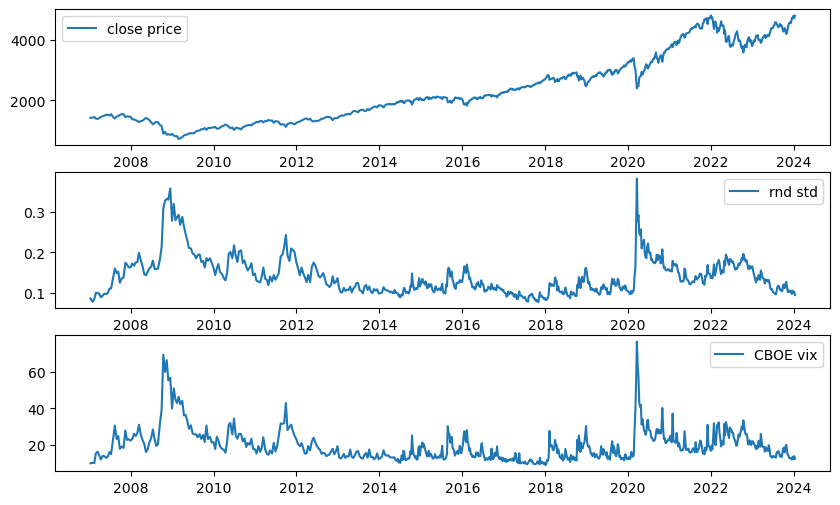

In [5]:
fig, axes = plt.subplots(3,1,figsize=(10, 6))

axes[0].plot(full_df.index,full_df['Close'], label = 'close price')
axes[1].plot(full_df.index,full_df['sd'], label = 'rnd std')
axes[2].plot(full_df.index,full_df['VIX'], label = 'CBOE vix')

axes[0].legend()
axes[1].legend()
axes[2].legend()
plt.plot()

[]

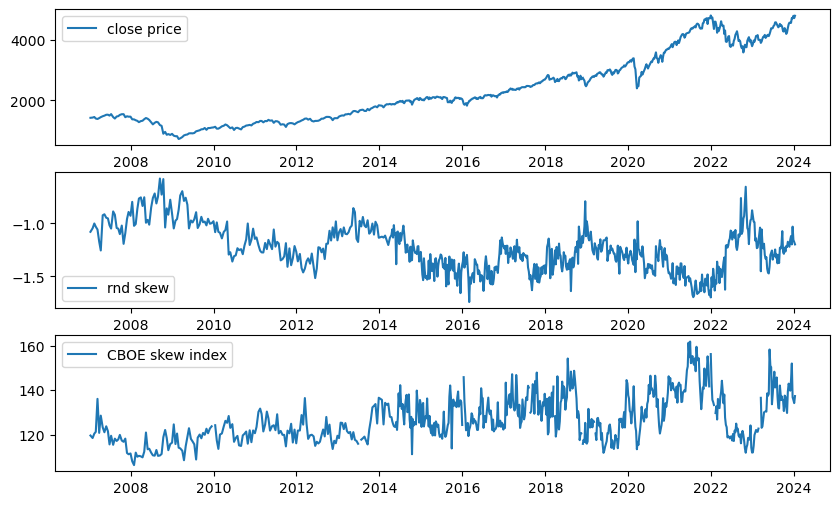

In [6]:
fig, axes = plt.subplots(3,1,figsize=(10, 6))

axes[0].plot(full_df.index,full_df['Close'], label = 'close price')
axes[1].plot(full_df.index,full_df['skew'], label = 'rnd skew')
axes[2].plot(full_df.index,full_df['SKEW'], label = 'CBOE skew index')

axes[0].legend()
axes[1].legend()
axes[2].legend()
plt.plot()